In [1]:
import pandas as pd 
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [2]:
DF=pd.read_csv('ambulance.csv')

In [3]:
DF.head()

,Date,Station Area,Clinical Status,TOC,ORD,MOB,IA,LS,AH,MAV,CD
0,01/01/2013,Tallaght,Non ProQa Class,00:02:09,00:04:14,00:04:58,00:10:16,NaN,NaN,00:27:47,00:29:24
1,01/01/2013,Tara St,Bravo,00:02:41,00:14:41,00:15:04,00:18:10,NaN,NaN,00:20:52,00:22:47
2,01/01/2013,Finglas,Delta,00:13:52,00:16:26,00:16:51,00:25:06,00:29:36,00:37:35,00:41:49,00:47:15
3,01/01/2013,Tara St,Bravo,00:06:58,00:22:33,00:22:59,00:34:48,NaN,NaN,00:43:21,00:44:18
4,01/01/2013,Tara St,Alpha,00:14:56,00:23:25,00:23:35,00:27:25,00:39:19,NaN,01:05:37,01:12:15


## Cleaning Data

In [4]:
DF=DF[['Date','Station Area','Clinical Status','TOC','IA']]
DF.head()

,Date,Station Area,Clinical Status,TOC,IA
0,01/01/2013,Tallaght,Non ProQa Class,00:02:09,00:10:16
1,01/01/2013,Tara St,Bravo,00:02:41,00:18:10
2,01/01/2013,Finglas,Delta,00:13:52,00:25:06
3,01/01/2013,Tara St,Bravo,00:06:58,00:34:48
4,01/01/2013,Tara St,Alpha,00:14:56,00:27:25


In [5]:
DF.shape

(220828, 5)

In [6]:
DF.isnull().sum(axis = 0)

Date                   0
Station Area           0
Clinical Status        0
TOC                    0
IA                 35352
dtype: int64

In [7]:
DF = DF.dropna(axis=0, subset=['IA'])
DF.isnull().sum(axis = 0)

Date               0
Station Area       0
Clinical Status    0
TOC                0
IA                 0
dtype: int64

In [8]:
DF.loc[:,'TOC'] = pd.to_datetime(DF.Date.astype(object)+' '+DF.TOC.astype(object))
DF.loc[:,'IA'] = pd.to_datetime(DF.Date.astype(object)+' '+DF.IA.astype(object))
DF.head()

,Date,Station Area,Clinical Status,TOC,IA
0,01/01/2013,Tallaght,Non ProQa Class,2013-01-01 00:02:09,2013-01-01 00:10:16
1,01/01/2013,Tara St,Bravo,2013-01-01 00:02:41,2013-01-01 00:18:10
2,01/01/2013,Finglas,Delta,2013-01-01 00:13:52,2013-01-01 00:25:06
3,01/01/2013,Tara St,Bravo,2013-01-01 00:06:58,2013-01-01 00:34:48
4,01/01/2013,Tara St,Alpha,2013-01-01 00:14:56,2013-01-01 00:27:25


## Calculating Response Time

In [9]:
DF['Response Time'] = DF['IA'] - DF['TOC']
DF['Response Time']=DF['Response Time']/np.timedelta64(1,'s')
 
DF.head()

,Date,Station Area,Clinical Status,TOC,IA,Response Time
0,01/01/2013,Tallaght,Non ProQa Class,2013-01-01 00:02:09,2013-01-01 00:10:16,487.0
1,01/01/2013,Tara St,Bravo,2013-01-01 00:02:41,2013-01-01 00:18:10,929.0
2,01/01/2013,Finglas,Delta,2013-01-01 00:13:52,2013-01-01 00:25:06,674.0
3,01/01/2013,Tara St,Bravo,2013-01-01 00:06:58,2013-01-01 00:34:48,1670.0
4,01/01/2013,Tara St,Alpha,2013-01-01 00:14:56,2013-01-01 00:27:25,749.0


In [10]:
mask = (DF['Response Time'] <0 )
DF['TOC'][mask] = DF['TOC'] -pd.Timedelta('1 day')
DF['Response Time'].mask(DF['Response Time'] < 0, 86400 +DF['Response Time'], inplace=True)

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
my_counter = len(DF[DF['Response Time'] > 21600])
my_counter

8

In [12]:
Unusual_data=DF[DF['Response Time'] > 21600]
Unusual_data

,Date,Station Area,Clinical Status,TOC,IA,Response Time
12552,05/03/2013,Tara St,Non ProQa Class,2013-05-02 20:10:58,2013-05-03 09:07:22,46584.0
59920,27/10/2013,Dolphins Barn,Omega,2013-10-26 01:49:07,2013-10-27 01:07:34,83907.0
131571,26/10/2014,Finglas,A,2014-10-25 01:41:30,2014-10-26 01:04:23,84173.0
150715,27/01/2015,Phibsborough,A,2015-01-26 20:04:15,2015-01-27 04:40:41,30986.0
152884,07/02/2015,Kilbarrack,D,2015-07-01 20:21:50,2015-07-02 05:37:46,33356.0
154158,14/02/2015,North Strand,B,2015-02-14 02:00:36,2015-02-14 08:46:22,24346.0
193384,26/08/2015,Dolphins Barn,D,2015-08-26 09:15:52,2015-08-26 23:52:00,52568.0
206049,25/10/2015,Swords,C,2015-10-24 01:38:57,2015-10-25 01:05:24,84387.0


In [13]:
DF.drop(DF[DF['Response Time'] > 43200].index, inplace=True)

## Weather

In [14]:
weather=pd.read_csv('weather_historical_data.csv')
new_weather=weather[['Date time','Precipitation','Wind Speed']]
new_weather.head()

,Date time,Precipitation,Wind Speed
0,01/01/2013,NaN,13.0
1,01/02/2013,0.1,15.1
2,01/03/2013,NaN,12.3
3,01/04/2013,NaN,16.4
4,01/05/2013,NaN,16.1


In [15]:
new_weather=new_weather.fillna(0)
new_weather.rename(columns={'Date time':'Date'}, inplace=True) # changing name of column in order to merge
new_weather.head(5)

,Date,Precipitation,Wind Speed
0,01/01/2013,0.0,13.0
1,01/02/2013,0.1,15.1
2,01/03/2013,0.0,12.3
3,01/04/2013,0.0,16.4
4,01/05/2013,0.0,16.1


In [16]:
DF['Date'] = pd.to_datetime(DF['Date'], format='%d/%m/%Y')
new_weather['Date'] = pd.to_datetime(new_weather['Date'], format='%m/%d/%Y')
DF = pd.merge(DF, new_weather, on='Date')
DF.head(5)

,Date,Station Area,Clinical Status,TOC,IA,Response Time,Precipitation,Wind Speed
0,2013-01-01,Tallaght,Non ProQa Class,2013-01-01 00:02:09,2013-01-01 00:10:16,487.0,0.0,13.0
1,2013-01-01,Tara St,Bravo,2013-01-01 00:02:41,2013-01-01 00:18:10,929.0,0.0,13.0
2,2013-01-01,Finglas,Delta,2013-01-01 00:13:52,2013-01-01 00:25:06,674.0,0.0,13.0
3,2013-01-01,Tara St,Bravo,2013-01-01 00:06:58,2013-01-01 00:34:48,1670.0,0.0,13.0
4,2013-01-01,Tara St,Alpha,2013-01-01 00:14:56,2013-01-01 00:27:25,749.0,0.0,13.0


## Events

In [17]:
events=pd.read_csv('events.csv')
events=events.fillna('none')
events.rename(columns={'Type':'Event'}, inplace=True)
events.head()

,Date,Event
0,01/01/2013,Christmas Break
1,01/02/2013,Christmas Break
2,01/03/2013,Christmas Break
3,01/04/2013,Christmas Break
4,01/05/2013,none


In [18]:
events['Date'] = pd.to_datetime(events['Date'], format='%m/%d/%Y')
DF = pd.merge(DF, events, on='Date')
DF.Event.unique()

array(['Christmas Break', 'none', 'Rugby Match', 'Mid Term',
       "St Patrick's Day", 'Easter', 'Football Match', 'Marathon',
       'Hurling Match', 'Christmas Eve', 'Christmas', "St Stephen's Day",
       'New Years Eve', 'New Years Day'], dtype=object)

## Changing format

In [19]:
DF['Hour'] = DF['TOC'].dt.hour
DF['Day']=DF['TOC'].dt.day
DF['Month']=DF['TOC'].dt.month
DF.head()

,Date,Station Area,Clinical Status,TOC,IA,Response Time,Precipitation,Wind Speed,Event,Hour,Day,Month
0,2013-01-01,Tallaght,Non ProQa Class,2013-01-01 00:02:09,2013-01-01 00:10:16,487.0,0.0,13.0,Christmas Break,0,1,1
1,2013-01-01,Tara St,Bravo,2013-01-01 00:02:41,2013-01-01 00:18:10,929.0,0.0,13.0,Christmas Break,0,1,1
2,2013-01-01,Finglas,Delta,2013-01-01 00:13:52,2013-01-01 00:25:06,674.0,0.0,13.0,Christmas Break,0,1,1
3,2013-01-01,Tara St,Bravo,2013-01-01 00:06:58,2013-01-01 00:34:48,1670.0,0.0,13.0,Christmas Break,0,1,1
4,2013-01-01,Tara St,Alpha,2013-01-01 00:14:56,2013-01-01 00:27:25,749.0,0.0,13.0,Christmas Break,0,1,1


In [20]:
DF['IsWeekend'] = ((pd.DatetimeIndex(DF.Date).dayofweek) // 5 == 1).astype(float)
DF.head()

,Date,Station Area,Clinical Status,TOC,IA,Response Time,Precipitation,Wind Speed,Event,Hour,Day,Month,IsWeekend
0,2013-01-01,Tallaght,Non ProQa Class,2013-01-01 00:02:09,2013-01-01 00:10:16,487.0,0.0,13.0,Christmas Break,0,1,1,0.0
1,2013-01-01,Tara St,Bravo,2013-01-01 00:02:41,2013-01-01 00:18:10,929.0,0.0,13.0,Christmas Break,0,1,1,0.0
2,2013-01-01,Finglas,Delta,2013-01-01 00:13:52,2013-01-01 00:25:06,674.0,0.0,13.0,Christmas Break,0,1,1,0.0
3,2013-01-01,Tara St,Bravo,2013-01-01 00:06:58,2013-01-01 00:34:48,1670.0,0.0,13.0,Christmas Break,0,1,1,0.0
4,2013-01-01,Tara St,Alpha,2013-01-01 00:14:56,2013-01-01 00:27:25,749.0,0.0,13.0,Christmas Break,0,1,1,0.0


In [21]:
DF['Hour'] = pd.Categorical(DF.Hour)
DF['Day'] = pd.Categorical(DF.Day)
DF['Month'] = pd.Categorical(DF.Month)
DF['Station Area'] = pd.Categorical(DF['Station Area'])
DF['Clinical Status'] = pd.Categorical(DF['Clinical Status'])

In [22]:
DF = pd.get_dummies(DF, prefix_sep='_', drop_first=True)
DF.head()

,Date,TOC,IA,Response Time,Precipitation,Wind Speed,IsWeekend,Station Area_Blanchardstown,Station Area_Dolphins Barn,Station Area_Donnybrook,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2013-01-01,2013-01-01 00:02:09,2013-01-01 00:10:16,487.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-01,2013-01-01 00:02:41,2013-01-01 00:18:10,929.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-01,2013-01-01 00:13:52,2013-01-01 00:25:06,674.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-01,2013-01-01 00:06:58,2013-01-01 00:34:48,1670.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-01,2013-01-01 00:14:56,2013-01-01 00:27:25,749.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test = DF[DF['TOC'].dt.year == 2015]
train=DF[DF['TOC'].dt.year != 2015]
test.head()

,Date,TOC,IA,Response Time,Precipitation,Wind Speed,IsWeekend,Station Area_Blanchardstown,Station Area_Dolphins Barn,Station Area_Donnybrook,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
122305,2015-01-01,2015-01-01 00:01:54,2015-01-01 00:13:57,723.0,0.2,27.6,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122306,2015-01-01,2015-01-01 00:14:37,2015-01-01 00:28:31,834.0,0.2,27.6,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122307,2015-01-01,2015-01-01 00:09:12,2015-01-01 00:29:25,1213.0,0.2,27.6,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122308,2015-01-01,2015-01-01 00:18:07,2015-01-01 00:34:19,972.0,0.2,27.6,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122309,2015-01-01,2015-01-01 00:20:57,2015-01-01 00:35:10,853.0,0.2,27.6,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Baseline Model

In [24]:
mean=test['Response Time'].mean()
test['2015 Base Prediction']=mean


C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
Y_train=train['Response Time']
X_train=train.drop(columns=['Response Time','Date','TOC','IA'])
Y_test=test['Response Time']
X_test=test.drop(columns=['Response Time','Date','TOC','IA','2015 Base Prediction'])

In [26]:
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train).fit()
y_pred = model.predict(X_train)  
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:          Response Time   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              2013.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):                        0.00
Time:                        20:07:04   Log-Likelihood:                     -9.8581e+05
No. Observations:              122307   AIC:                                  1.972e+06
Df Residuals:                  122198   BIC:                                  1.973e+06
Df Model:                         109                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [27]:
train['Predictions']=y_pred

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
train.head()

,Date,TOC,IA,Response Time,Precipitation,Wind Speed,IsWeekend,Station Area_Blanchardstown,Station Area_Dolphins Barn,Station Area_Donnybrook,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Predictions
0,2013-01-01,2013-01-01 00:02:09,2013-01-01 00:10:16,487.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,697.096155
1,2013-01-01,2013-01-01 00:02:41,2013-01-01 00:18:10,929.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,536.153196
2,2013-01-01,2013-01-01 00:13:52,2013-01-01 00:25:06,674.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,631.317405
3,2013-01-01,2013-01-01 00:06:58,2013-01-01 00:34:48,1670.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,536.153196
4,2013-01-01,2013-01-01 00:14:56,2013-01-01 00:27:25,749.0,0.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,716.781904


In [29]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

766.0108960426068


In [30]:
print(metrics.mean_absolute_error(Y_train,y_pred))

462.0256663015775


In [31]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
mean_absolute_percentage_error(Y_train,y_pred)

58.89984411065943

In [33]:
Y_test.head()

122305     723.0
122306     834.0
122307    1213.0
122308     972.0
122309     853.0
Name: Response Time, dtype: float64

In [34]:
#X_test =sm.add_constant( X_test )
y_pred_2015 = model.predict(X_test)
test['Predictions']=y_pred_2015


C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
linear_rmse=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred_2015)))

In [36]:
linear_mae=(metrics.mean_absolute_error(Y_test,y_pred_2015))

In [37]:
linear_accuracy=100-(mean_absolute_percentage_error(Y_test,y_pred_2015))

In [38]:
base_2015_rmse=(np.sqrt(metrics.mean_squared_error(Y_test,test['2015 Base Prediction'])))

In [39]:
base_2015_mae=(metrics.mean_absolute_error(Y_test,test['2015 Base Prediction']))

In [40]:
base_2015_accuracy=100-(mean_absolute_percentage_error(Y_test,test['2015 Base Prediction']))

## Reducing the model

In [41]:
len(list(X_train.columns))

109

In [42]:
Y_train=train['Response Time']
X_train=train.drop(columns=['Response Time','Date','TOC','IA','Predictions'])
Y_test=test['Response Time']
X_test=test.drop(columns=['Response Time','Date','TOC','IA','Predictions','2015 Base Prediction'])

In [43]:
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\Lauren\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Precipitation', 'Wind Speed', 'IsWeekend', 'Station Area_Blanchardstown', 'Station Area_Dolphins Barn', 'Station Area_Donnybrook', 'Station Area_Dun Laoghaire', 'Station Area_Finglas', 'Station Area_Kilbarrack', 'Station Area_MH14', 'Station Area_North Strand', 'Station Area_Phibsborough', 'Station Area_Rathfarnham', 'Station Area_Skerries', 'Station Area_Swords', 'Station Area_Tallaght', 'Station Area_Tara St', 'Clinical Status_Alpha', 'Clinical Status_B', 'Clinical Status_Bravo', 'Clinical Status_C', 'Clinical Status_Charlie', 'Clinical Status_D', 'Clinical Status_Delta', 'Clinical Status_E', 'Clinical Status_Echo', 'Clinical Status_Non ProQa Class', 'Clinical Status_Not Classed', 'Clinical Status_O', 'Event_Christmas Break', 'Event_Easter', 'Event_Football Match', 'Event_Hurling Match', 'Event_Marathon', 'Event_Mid Term', 'Event_New Years Day', 'Event_Rugby Match', "Event_St Patrick's Day", "Event_St Stephen's Day", 'Event_none', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', '

In [44]:
len(selected_features_BE)

82

In [45]:
X_train_improved = X_train.loc[:, selected_features_BE]
X_test_improved = X_test.loc[:, selected_features_BE]
lr.fit(X_train_improved,Y_train)
model = sm.OLS(Y_train, X_train_improved).fit()
y_pred_improved = lr.predict(X_train_improved)
train['Predictions_improved']=y_pred_improved

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
print(np.sqrt(metrics.mean_squared_error(Y_train,y_pred_improved)))

763.5480289497149


In [47]:
print(metrics.mean_absolute_error(Y_train,y_pred_improved))

459.3125793327851


In [48]:
mean_absolute_percentage_error(Y_train,y_pred_improved)

58.43856195498546

In [49]:
y_pred_test_improved = model.predict(X_test_improved)

In [50]:
reduced_rmse=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred_test_improved)))

In [51]:
reduced_mae=(metrics.mean_absolute_error(Y_test,y_pred_test_improved))

In [52]:
reduced_accuracy=100-(mean_absolute_percentage_error(Y_test,y_pred_test_improved))

### Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(X_train,Y_train)
RF_predictions = rf.predict(X_train)
train['RF Predictions']=RF_predictions

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
print(np.sqrt(metrics.mean_squared_error(Y_train,RF_predictions)))

345.08366872708865


In [55]:
print(metrics.mean_absolute_error(Y_train,RF_predictions))

200.09280500692034


In [56]:
mean_absolute_percentage_error(Y_train,RF_predictions)

24.906201026449903

In [57]:
RF_predictions_test = rf.predict(X_test)

In [58]:
test['RF Predictions']=RF_predictions_test

C:\Users\Lauren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
RFR_rmse=(np.sqrt(metrics.mean_squared_error(Y_test,RF_predictions_test)))

In [60]:
RFR_mae=(metrics.mean_absolute_error(Y_test,RF_predictions_test))

In [61]:
RFR_accuracy=100-(mean_absolute_percentage_error(Y_test,RF_predictions_test))

In [62]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
ambulance_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns.values), importances)if importance >0.01]
# Sort the feature importances by most important first
ambulance_importances = sorted(ambulance_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in ambulance_importances];


Variable: Wind Speed           Importance: 0.13
Variable: Precipitation        Importance: 0.04
Variable: Station Area_Dolphins Barn Importance: 0.02
Variable: Station Area_Finglas Importance: 0.02
Variable: Station Area_Kilbarrack Importance: 0.02
Variable: Station Area_Phibsborough Importance: 0.02
Variable: Station Area_Tallaght Importance: 0.02
Variable: Clinical Status_Alpha Importance: 0.02
Variable: Clinical Status_C    Importance: 0.02
Variable: Clinical Status_Omega Importance: 0.02
Variable: Station Area_Blanchardstown Importance: 0.01
Variable: Station Area_Rathfarnham Importance: 0.01
Variable: Station Area_Swords  Importance: 0.01
Variable: Station Area_Tara St Importance: 0.01
Variable: Clinical Status_B    Importance: 0.01
Variable: Clinical Status_Bravo Importance: 0.01
Variable: Clinical Status_Charlie Importance: 0.01
Variable: Clinical Status_O    Importance: 0.01
Variable: Day_3                Importance: 0.01
Variable: Day_12               Importance: 0.01
Variable

In [64]:
ambulance_importances_graph = pd.DataFrame(ambulance_importances, columns = ['Feature','Importance'])

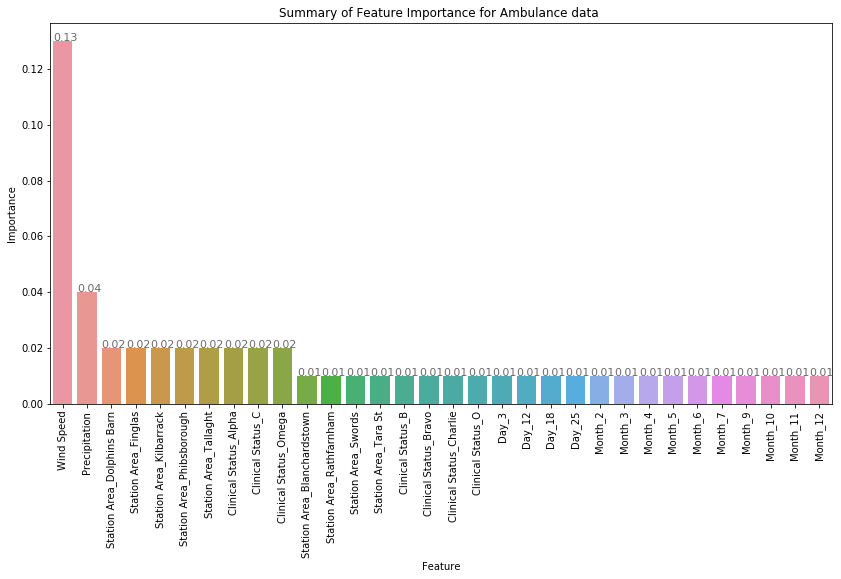

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax =plt.subplots()
fig.set_size_inches(14,7)
ax = sns.barplot(x="Feature", y="Importance", data= ambulance_importances_graph)
ax.set(ylabel="Importance",xlabel="Feature", title="Summary of Feature Importance for Ambulance data ")
#for putting the figures above the bars
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 5)), fontsize=11, color='dimgrey',
                rotation=0)
plt.xticks(rotation=90)
plt.show()

## ARIMA model

In [ ]:
DF_Arima=DF.copy()
DF_Arima.index = DF.Date 
DF_Arima = DF_Arima.resample('D').mean()
#train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train_Arima=train.copy()
test_Arima=test.copy()
train_Arima.index = train.Date
train_Arima = train_Arima.resample('D').mean() 
#test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_Arima.index = test.Date
test_Arima = test_Arima.resample('D').mean()

In [ ]:
import matplotlib.pyplot as plt 
train_Arima['Response Time'].plot(figsize=(15,8), title= 'Response Times', fontsize=14)
test_Arima['Response Time'].plot(figsize=(15,8), title= 'Response Times', fontsize=14)
plt.show()

In [ ]:
arima_pred_test = test_Arima.copy()
arima_pred_train= train_Arima.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_Arima['Response Time'], order=(1, 0, 1),seasonal_order=(0,1,1,7)).fit()
arima_pred_train['SARIMA'] = fit1.predict(start="2013-01-01", end="2014-12-31")
arima_pred_test['SARIMA'] = fit1.predict(start="2015-01-01", end="2015-12-31", dynamic=True)
arima_pred_test=arima_pred_test.fillna(0)
arima_pred_train=arima_pred_train.fillna(0)
plt.figure(figsize=(16,8))
plt.plot( train_Arima['Response Time'], label='Train')
plt.plot(test_Arima['Response Time'], label='Test')
plt.plot(arima_pred_test['SARIMA'], label='SARIMA')
plt.plot(arima_pred_train['SARIMA'], label='train_pred')
plt.legend(loc='best')
plt.show()

In [ ]:
arima_pred_test.head()
arima_Result_train=arima_pred_train[['SARIMA']]
arima_Result= arima_pred_test[['SARIMA']]
arima_Result_train.reset_index(level=0, inplace=True)
arima_Result.reset_index(level=0, inplace=True)
arima_Result.head()

In [ ]:
test=pd.merge(test,arima_Result, on='Date')
train=pd.merge(train,arima_Result_train, on='Date')
test.head()

In [ ]:
arima_rmse=(np.sqrt(metrics.mean_squared_error(test['Response Time'],test['SARIMA'])))
print(arima_rmse)

In [ ]:
arima_mae=(metrics.mean_absolute_error(test['Response Time'],test['SARIMA']))
print(arima_mae)

In [ ]:
arima_accuracy=100-(mean_absolute_percentage_error(test['Response Time'],test['SARIMA']))
print(arima_accuracy)

## Incorporation of ARIMA results into linear model

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
Y_train=train['Response Time']
X_train=train.drop(columns=['Response Time','Date','TOC','IA','Predictions','Predictions_improved','RF Predictions'])
Y_test=test['Response Time']
X_test=test.drop(columns=['Response Time','Date','TOC','IA','2015 Base Prediction','Predictions','RF Predictions'])

In [ ]:
lr.fit(X_train,Y_train)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train).fit()
y_pred = model.predict(X_train)
y_pred_2015=model.predict(X_test)
print_model = model.summary()
print(print_model)

In [ ]:
train['LA_Predictions']=y_pred

In [ ]:
print(np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

In [ ]:
print(metrics.mean_absolute_error(Y_train,y_pred))

In [ ]:
mean_absolute_percentage_error(Y_train,y_pred)

In [ ]:
LA_rmse=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred_2015)))
print(LA_rmse)

In [ ]:
LA_mae=(metrics.mean_absolute_error(Y_test,y_pred_2015))
print(LA_mae)

In [ ]:
LA_accuracy=100-mean_absolute_percentage_error(Y_test,y_pred_2015)
print(LA_accuracy)

## Plotting graphs of results

In [ ]:
rmse_results = [('baseline', base_2015_rmse),
                ('Linear Regression',linear_rmse),
                ('Reduced Linear Model',reduced_rmse),
                ('Random Forest',RFR_rmse),
                ('Linear_Arima',LA_rmse)]

In [ ]:
final_rmse = pd.DataFrame(rmse_results, columns = ['Method','RMSE'])

In [ ]:
import seaborn as sns
fig, ax =plt.subplots()
fig.set_size_inches(14,7)
ax = sns.barplot(x="Method", y="RMSE", data= final_rmse)
ax.set(ylabel="RMSE",xlabel="Method", title="Summary of RMSE for all methods ")
#for putting the figures above the bars
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 5)), fontsize=11, color='dimgrey',
                rotation=0)
plt.xticks(rotation=40)

In [ ]:
mae_results = [('baseline',base_2015_mae),
                ('Linear Regression',linear_mae),
                ('Reduced Linear Model',reduced_mae),
                ('Random Forest',RFR_mae),
                ('Linear_Arima',LA_mae)]

In [ ]:
final_mae = pd.DataFrame(mae_results, columns = ['Method','MAE'])

In [ ]:
import seaborn as sns
fig, ax =plt.subplots()
fig.set_size_inches(14,7)
ax = sns.barplot(x="Method", y="MAE", data= final_mae)
ax.set(ylabel="MAE",xlabel="Method", title="Summary of MAE for all methods ")
#for putting the figures above the bars
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 5)), fontsize=11, color='dimgrey',
                rotation=0)
plt.xticks(rotation=40)

In [ ]:
base_2015_var=base_2015_rmse-base_2015_mae
linear_var=linear_rmse-linear_mae
reduced_linear_var=reduced_rmse-reduced_mae
RFR_var=RFR_rmse-RFR_mae
LA_var=LA_rmse-LA_mae

In [ ]:
var_results = [('2015 baseline',base_2015_var),
                ('Linear Regression',linear_var),
                ('Reduced Linear Model',reduced_linear_var),
                ('Random Forest',RFR_var),
                ('Linear_Arima',LA_var)]

In [ ]:
final_var = pd.DataFrame(var_results, columns = ['Method','variance'])

In [ ]:
fig, ax =plt.subplots()
fig.set_size_inches(14,7)
ax = sns.barplot(x="Method", y="variance", data= final_var)
ax.set(ylabel="accuracy",xlabel="Method", title="Summary of variance of errors all methods ")
#for putting the figures above the bars
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 5)), fontsize=11, color='dimgrey',
                rotation=0)
plt.xticks(rotation=40)

In [ ]:
accuracy_results = [('baseline',base_2015_accuracy),
                ('Linear Regression',linear_accuracy),
                ('Reduced Linear Model',reduced_accuracy),
                ('Random Forest',RFR_accuracy),
                ('Linear_Arima',LA_accuracy)]

In [ ]:
final_accuracy = pd.DataFrame(accuracy_results, columns = ['Method','accuracy'])

In [ ]:
fig, ax =plt.subplots()
fig.set_size_inches(14,7)
ax = sns.barplot(x="Method", y="accuracy", data= final_accuracy)
ax.set(ylabel="accuracy",xlabel="Method", title="Summary of accuracy for all methods ")
#for putting the figures above the bars
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 5)), fontsize=11, color='dimgrey',
                rotation=0)
plt.xticks(rotation=40)